In [1]:
import kagglehub
path = kagglehub.dataset_download("aslanahmedov/walmart-sales-forecast")
print("Path to dataset files:", path)

100%|██████████| 3.36M/3.36M [00:00<00:00, 85.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aslanahmedov/walmart-sales-forecast/versions/1


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
features = pd.read_csv(path + "/features.csv")
stores = pd.read_csv(path + "/stores.csv")
train = pd.read_csv(path + "/train.csv")

In [3]:
data = train.merge(stores, on="Store").merge(features, on=['Store','Date','IsHoliday'], how='left')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


## **Data Cleaning**

In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
data.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,270889


In [6]:
data.fillna({
    'MarkDown1': 0, 'MarkDown2': 0, 'MarkDown3': 0, 'MarkDown4': 0, 'MarkDown5': 0,}, inplace=True)

In [7]:
data.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,0


In [8]:
data.dtypes

,0
Store,int64
Dept,int64
Date,object
Weekly_Sales,float64
IsHoliday,bool
Type,object
Size,int64
Temperature,float64
Fuel_Price,float64
MarkDown1,float64


In [9]:
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [11]:
negative_sales = data[data['Weekly_Sales']<0]
negative_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
846,1,6,2012-08-10,-139.65,False,A,151315,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908
2384,1,18,2012-05-04,-1.27,False,A,151315,75.55,3.749,21290.13,0.0,69.89,4977.35,3261.04,221.671800,7.143
6048,1,47,2010-02-19,-863.00,False,A,151315,39.93,2.514,0.00,0.0,0.00,0.00,0.00,211.289143,8.106
6049,1,47,2010-03-12,-698.00,False,A,151315,57.79,2.667,0.00,0.0,0.00,0.00,0.00,211.380643,8.106
6051,1,47,2010-10-08,-58.00,False,A,151315,63.93,2.633,0.00,0.0,0.00,0.00,0.00,211.746754,7.838


In [12]:
data['Weekly_Sales'] = data['Weekly_Sales'].where(data['Weekly_Sales']>=0, 0)

In [13]:
new_negative = data[data['Weekly_Sales']<0]
print(len(new_negative))

0


In [14]:
Q1 = data['Weekly_Sales'].quantile(0.25)
Q3 = data['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Weekly_Sales'] < (Q1 - 1.5 * IQR)) | (data['Weekly_Sales'] > (Q3 + 1.5 * IQR))]
print(len(outliers))

35521


In [15]:
data['Weekly_Sales'] = data['Weekly_Sales'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)

## **Monthly Sales**

In [16]:
data['Month'] = data['Date'].dt.to_period('M')

In [17]:
pd.set_option('display.float_format', '{:.0f}'.format)
monthly_sales = data.groupby('Month')['Weekly_Sales'].sum().to_frame(name='Monthly_Sales')
monthly_sales.index = monthly_sales.index.to_timestamp()
print(monthly_sales.head())

            Monthly_Sales
Month                    
2010-02-01      161042550
2010-03-01      157322545
2010-04-01      200631855
2010-05-01      162075884
2010-06-01      166254096


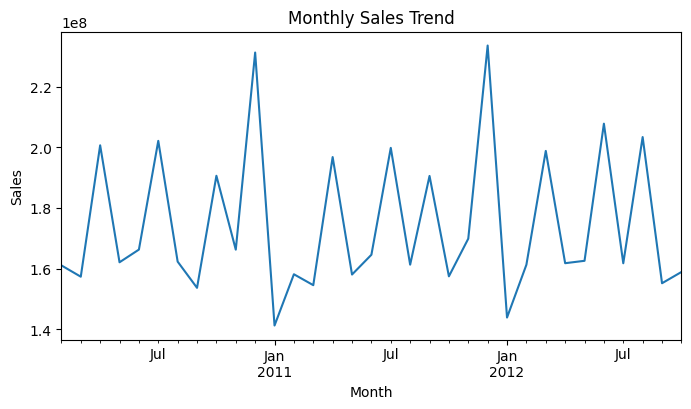

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
monthly_sales['Monthly_Sales'].plot(title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

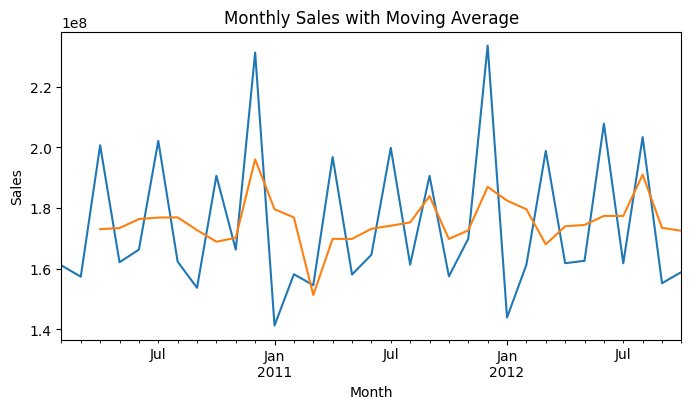

In [19]:
monthly_sales['Moving_Avg'] = monthly_sales['Monthly_Sales'].rolling(window=3).mean()
plt.figure(figsize=(8,4))
monthly_sales['Monthly_Sales'].plot(label='Actual Sales')
monthly_sales['Moving_Avg'].plot(label='3-Month Moving Average')
plt.title("Monthly Sales with Moving Average")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

<Figure size 1000x1000 with 0 Axes>

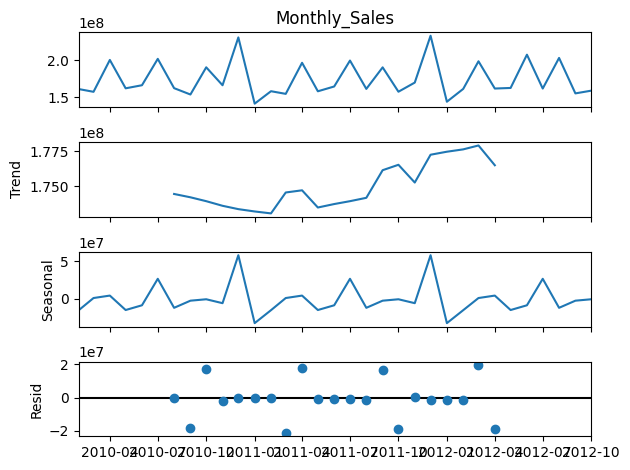

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(10,10))
decompose = seasonal_decompose(monthly_sales['Monthly_Sales'],model='additive', period=12)
decompose.plot()
plt.show()

In [21]:
dep_monthly = data.groupby(['Dept','Month'])['Weekly_Sales'].sum().unstack('Dept')
dep_monthly.index = dep_monthly.index.to_timestamp()

<Figure size 800x400 with 0 Axes>

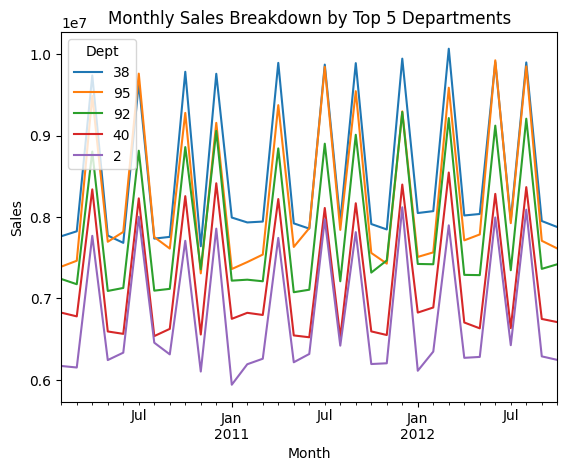

In [22]:
top_dep = dep_monthly.sum().nlargest(5).index
plt.figure(figsize=(8,4))
dep_monthly[top_dep].plot()
plt.title('Monthly Sales Breakdown by Top 5 Departments')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

<Figure size 800x400 with 0 Axes>

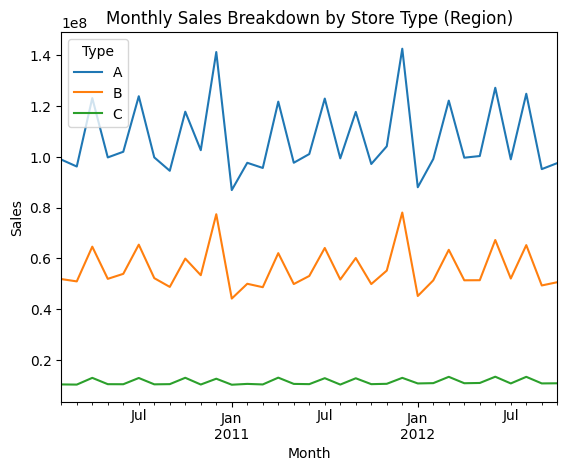

In [23]:
type_month = data.groupby(['Type','Month'])['Weekly_Sales'].sum().unstack('Type')
type_month.index = type_month.index.to_timestamp()
plt.figure(figsize=(8,4))
type_month.plot()
plt.title('Monthly Sales Breakdown by Store Type (Region)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

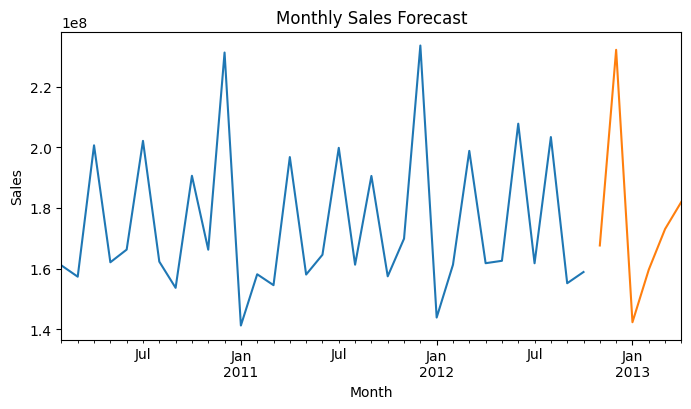

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(monthly_sales['Monthly_Sales'],trend='add',seasonal='add',seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(6)
plt.figure(figsize=(8,4))
monthly_sales['Monthly_Sales'].plot(label='Actual Sales')
forecast.plot(label='Forecast')
plt.title('Monthly Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [25]:
data = data.to_csv('cleaned_data.csv', index=False)
monthly_sales = monthly_sales.to_csv('monthly_sales.csv')
dep_monthly = dep_monthly.to_csv('dep_monthly_sales.csv')